# How does the internet affect the Women Health? (Non communicable diseases)

#### The main 4 types of non-communicable diseases are cardiovascular diseases, cancers, diabetes and chronic respiratory diseases.

### Loading the dataset

In [1]:
import pandas as pd
internet_data = pd.read_csv('share-of-individuals-using-the-internet.csv')
total_ncd_deaths_worldwide_data = pd.read_csv('NCD_Deaths.csv')
population_data = pd.read_csv('population.csv')

### Filtering the years

In [2]:
years = [2000, 2005, 2010, 2015]
internet_data = internet_data[internet_data.Year.isin(years)]
population_data = population_data[population_data.Year.isin(years)]

### Population using the internet

In [3]:
import numpy as np

population_internet_data = pd.DataFrame()
population_internet_data['year'] = internet_data['Year']
population_internet_data['population'] = (np.multiply(internet_data['Individuals using the Internet (% of population) (% of population)'] , population_data['Population']))/10000

### Standardizing the population data

In [4]:
total_ncd_deaths_worldwide_data['Total NCD Deaths'] = total_ncd_deaths_worldwide_data['Total NCD Deaths (in thousands)'] * 1000
#population_internet_data['population'] = population_internet_data['population'].apply(lambda x: '{:.2f}'.format(x))
population_internet_data['population']

8     2.057731e+06
13    5.106158e+06
18    1.001626e+07
23    1.600058e+07
Name: population, dtype: float64

### Aggregating the data

In [5]:
total_ncd_deaths_yearly = total_ncd_deaths_worldwide_data.groupby('Year')['Total NCD Deaths'].sum()
total_ncd_deaths_yearly

Year
2000    15205500.0
2005    16220400.0
2010    17497800.0
2015    18924500.0
Name: Total NCD Deaths, dtype: float64

### Plotting the data

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 11}

matplotlib.rc('font', **font)

E:\Anaconda\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


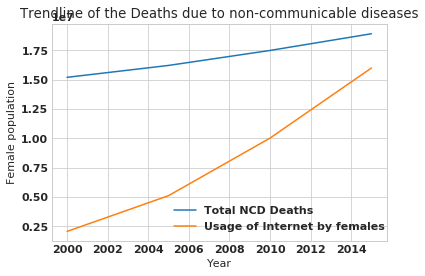

In [7]:
plt.figure(0)
plt.plot(years, total_ncd_deaths_yearly)
plt.xlabel('Year')
#plt.ylabel('No. of deaths due to non-communicable diseases')
#plt.ylim(15200000, 20000000)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Trendline of the Deaths due to non-communicable diseases');

#plt.figure(1)
plt.plot(years, population_internet_data['population'], label='Usage of Internet by females')
#plt.xlabel('Year')
plt.ylabel('Female population')
plt.legend(loc='lower center', bbox_to_anchor=(0.68, 0))
#plt.title('Internet Usage by females Worldwide');

plt.show()

#### The two plots show an increase. Due to the increase in the internet usage, women have given less importance to physical activities and excercises. This has led to an increase in the non communicable diseases.

### Categorizing the countries into 3 groups according to the income

Source for classification: 
Low Income: https://data.worldbank.org/income-level/low-income
High Income: https://data.worldbank.org/income-level/high-income
Middle Income: https://data.worldbank.org/income-level/middle-income

In [8]:
country_classes_data = pd.read_csv('countries_classes.csv')

### Year 2000 and 2015 Death vs Income

In [9]:
year_start = [2000]
deaths_2000_data = total_ncd_deaths_worldwide_data[total_ncd_deaths_worldwide_data.Year.isin(year_start)]
deaths_2000_data['Income'] = country_classes_data['Income']

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
total_ncd_deaths_income_2000 = deaths_2000_data.groupby('Income')['Total NCD Deaths'].sum()
total_ncd_deaths_income_2000

Income
High       844200.0
Low        209600.0
Middle    3643000.0
Name: Total NCD Deaths, dtype: float64

In [11]:
year_start = [2015]
deaths_2015_data = total_ncd_deaths_worldwide_data[total_ncd_deaths_worldwide_data.Year.isin(year_start)]
deaths_2015_data['Income'] = country_classes_data['Income']

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
total_ncd_deaths_income_2015 = deaths_2015_data.groupby('Income')['Total NCD Deaths'].sum()
total_ncd_deaths_income_2015

Income
High       954200.0
Low        315500.0
Middle    4981900.0
Name: Total NCD Deaths, dtype: float64

E:\Anaconda\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


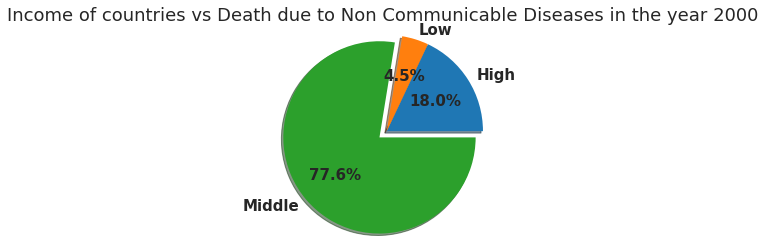

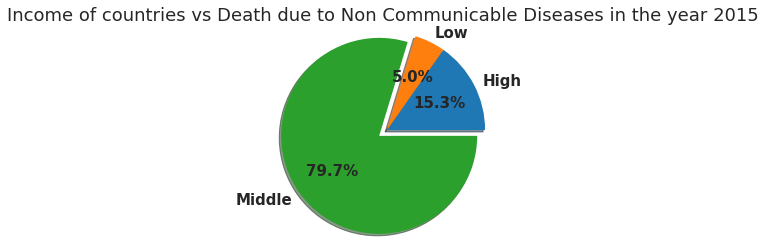

In [13]:
plt.style.use('seaborn-whitegrid')

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)

plt.figure(0)
plt.pie(total_ncd_deaths_income_2000, labels = ['High','Low','Middle'], explode =(0,0,0.1),  autopct='%1.1f%%', shadow=True);
plt.axis('equal')
plt.title('Income of countries vs Death due to Non Communicable Diseases in the year 2000');

plt.figure(1)
plt.pie(total_ncd_deaths_income_2015, labels = ['High','Low','Middle'], explode =(0,0,0.1),  autopct='%1.1f%%', shadow=True);
plt.axis('equal')
plt.title('Income of countries vs Death due to Non Communicable Diseases in the year 2015');

plt.show()

#### As the internet becomes accessible to all the countries, nearly 80% of these diseases are occuring in the low and middle-income countries. This fact is also mentioned in the articles: http://www.ifrc.org/en/what-we-do/health/diseases/noncommunicable-diseases/

### References
- http://apps.who.int/gho/data/node.main.A858?lang=en
- https://ourworldindata.org/internet
- https://ourworldindata.org/internet
- https://data.worldbank.org/income-level/low-income
- https://data.worldbank.org/income-level/high-income
- https://data.worldbank.org/income-level/middle-income
- http://www.ifrc.org/en/what-we-do/health/diseases/noncommunicable-diseases/